In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from numpy import genfromtxt
import pickle
import scipy 
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components
import matplotlib.pyplot as plt
import scipy.optimize as optim
import pysal
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import matplotlib
import seaborn as sns
from tqdm import tqdm
from sklearn.decomposition import PCA
import matplotlib.pylab as pl
sns.set()
sns.set_context("talk", font_scale = 1.5)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['axes.axisbelow'] = True
#matplotlib.rcParams.update({'figure.autolayout': True})
matplotlib.rcParams['figure.figsize'] = [10, 7]

C:\Users\Alex\Anaconda3\lib\site-packages\pysal\lib\weights\util.py:19: UserWarning: geopandas not available. Some functionality will be disabled.
  warn('geopandas not available. Some functionality will be disabled.')
C:\Users\Alex\Anaconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [2]:
connections = np.genfromtxt(r"C:\Users\Alex\Desktop\misc\1-Skeleton\Protien Analysis\PROTEINS\PROTEINS_A.txt", delimiter=',')
indicator = np.genfromtxt(r"C:\Users\Alex\Desktop\misc\1-Skeleton\Protien Analysis\PROTEINS\PROTEINS_graph_indicator.txt",delimiter=",")
attribs = np.genfromtxt(r"C:\Users\Alex\Desktop\misc\1-Skeleton\Protien Analysis\PROTEINS\PROTEINS_node_attributes.txt",delimiter=",")
connections = connections.astype(int)
sets = connections[:,1]

labels = []
for i in sets:
    labels.append(indicator[i-1])
    

graphs = []
for i in range(1113):
    graph = []
    for j in range(len(connections)):
        if labels[j] == i:
            graph.append(connections[j,:])
    graphs.append(graph)

In [3]:
sample = graphs[i]
samplez = np.vstack(sample)
samplez = samplez - samplez.min()

n = np.max(samplez)
M = np.zeros((n+1,n+1))
for i,j in samplez:
    M[i,j] = 1

In [4]:
maxs = []

for i in range(len(graphs)):
    if len(graphs[i]) > 0:
        sample = graphs[i]
        samplez = np.vstack(sample)
        maxs.append(np.max(samplez))
    

In [5]:
atrib = []
for i in range(len(maxs)):
    if i == 0: 
        atrib.append(attribs[0:maxs[0]])
    if i > 0:
        atrib.append(attribs[maxs[i-1]:maxs[i]])

In [6]:
maxs[0]

42

In [7]:
with open('pgraphs.pickle', 'wb') as handle:
    pickle.dump(graphs, handle)

In [8]:
atrib[0]

array([23., 10., 25.,  7., 12., 11.,  5.,  7.,  9.,  3.,  6., 22.,  8.,
       26.,  7., 12., 11.,  5.,  7.,  8.,  3.,  6.,  3.,  9., 10.,  7.,
       10.,  8.,  5.,  4.,  3.,  3.,  3.,  9., 10.,  7., 10.,  8.,  5.,
        4.,  3.,  3.])

In [9]:
with open('patrribs.pickle', 'wb') as handle:
    pickle.dump(atrib, handle)

In [10]:
def euler_char(A,graph):
    Betti1 = []
    edge = []
    vert = []
    com = []
    As = []
    Ms = []
    
    sample = graph
    samplez = np.vstack(sample)
    samplez = samplez - samplez.min()
    n = np.max(samplez)
    Mg = np.zeros((n+1,n+1))
    for i,j in samplez:
        Mg[i,j] = 1
    
    thresh = np.linspace(-10,50,50)
    
    for t in thresh:
        
        M = np.array(Mg)
        
        #Binary Image
#         A = (A - A.min())/(A.max() - A.min())
        binary = (A <= t)*1
        #Adjust Adjaceny Matrix
        count = 0
        for i in range(len(A)):
            if binary[i] == 0:
                M[count,:] = 0
                M[:,count] = 0
            count += 1
                
        #Number Edges
        Edges = np.sum(M)/2
        
        #Number Vertices
        Vertices = np.sum(binary)
        
        removed_Vertices = np.shape(M)[0] - Vertices
        
        #Number Connected Components
        graph = csr_matrix(M)
        n_comp = connected_components(csgraph = graph, directed = False, return_labels = False)
        n_comp = n_comp - removed_Vertices
        
        #Betti 1
        B1 = n_comp - Vertices + Edges
        
        Betti1.append(B1)
        
        edge.append(Edges)
        
        vert.append(Vertices)
        
        com.append(n_comp)
        
        As.append(binary)
        
        Ms.append(M)
        
    return Betti1

In [11]:
bett1 = euler_char(atrib[699],graphs[700])

In [12]:
betti1s = []

for i in range(100):
#     betti1s.append(euler_char(atrib[i],graphs[i+1]))
    a = np.hstack(euler_char(atrib[i],graphs[i+1]))
    
    betti1s.append((a - a.min())/(a.max() - a.min()))
    

In [13]:
betti2s = []

for i in tqdm(range(100)):
#     betti2s.append(euler_char(atrib[700+i],graphs[700+i+1]))

    a = np.hstack(euler_char(atrib[800+i],graphs[800+i+1]))
    betti2s.append((a - a.min())/(a.max() - a.min()))

 70%|████████████████████████████▋            | 70/100 [00:01<00:00, 51.76it/s]C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
100%|████████████████████████████████████████| 100/100 [00:01<00:00, 51.86it/s]


In [14]:
betti1z = np.vstack(betti1s)
betti2z = np.vstack(betti2s)

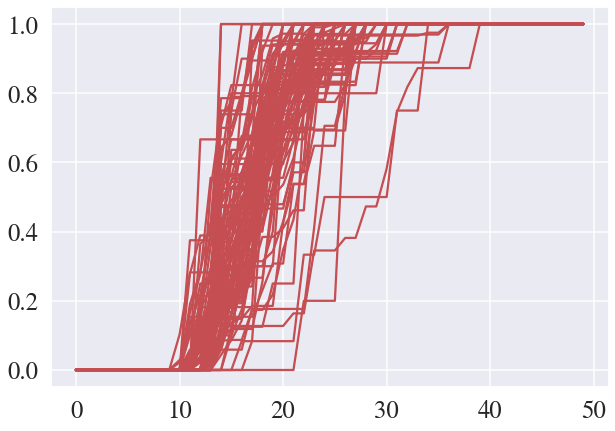

In [20]:
# plt.plot(betti2z.T,'b')
plt.plot(betti1z.T,'r')


In [53]:
import scipy.optimize as optim
p0 = np.random.exponential(size = 3)
bounds = (0,[100000,100,2000000])

def logistic(t,a,b,c):
    return c/(1+a*np.exp(-b*t))

def fit_log(Data,thresh):
    params = []
    for i in range(len(Data)):
        p0 = np.random.exponential(size = 3)
        bounds = (0,[100,50,20])
        x = thresh
        y = (Data[i] - Data[i].min())/(Data[i].max() - Data[i].min())
        if y.max() < 1000:
            (a,b,c),cov = optim.curve_fit(logistic,x,y,bounds = bounds, p0=p0)
            param = [a,b,c]
            params.append(param)
    return params

In [54]:

thresh = np.linspace(-10,50,50)
params = fit_log(betti1z,thresh)
params1day = fit_log(betti2z,thresh)

In [55]:
params1day

[[63.46369682978141, 0.32198529776904067, 1.001916420750084],
 [99.99999999999842, 0.6578553953157021, 1.003630052520355],
 [67.77172640761214, 0.5801804588197661, 0.9888293659686901],
 [99.99999999994034, 0.5476284012839614, 0.9923997901841467],
 [19.923754935967622, 0.219197654237331, 1.0008066503588595],
 [99.99999999999999, 0.25358998682079037, 1.03371014223105],
 [99.99999999999999, 1.6760096290299977, 1.0032314710152264],
 [15.312492158352796, 0.2305421782569472, 0.9899480045619934],
 [15.460241764100841, 0.36462603634017177, 0.9842122494058677],
 [99.99999999999999, 0.7175489829516642, 1.0071900227620714],
 [21.121905754357194, 0.23864577764194636, 1.005192208013025],
 [99.99999999999999, 0.7538891225259616, 1.0061124189953572],
 [34.06435521012011, 0.28530838553354976, 1.0042578862661806],
 [24.00900488030412, 0.26088265033643343, 0.9304793562199113],
 [99.99999999999999, 0.2698502350726545, 1.0251710563895682],
 [95.70005736844848, 0.5814800100065571, 0.9763671546883829],
 [99

In [56]:
paramz = np.asarray(params)

In [57]:
paramz2 = np.asarray(params1day)

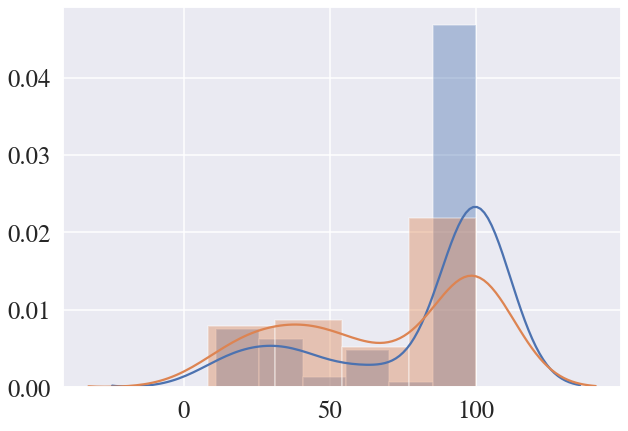

In [58]:
sns.distplot(paramz2[:,0])
sns.distplot(paramz[:,0])